In [1]:
import pandas as pd
import os

In [2]:
df_gdp=pd.read_csv(os.path.join('data', 'EU_GDP_2021.csv'))
df_gdp.dropna(subset=['2021 [YR2021]'], inplace=True)

# Filter countries with valid GDP number in year 2021
df_gdp_clean = df_gdp[df_gdp['2021 [YR2021]'].str.contains('\d+[\.|\d+]?')]

# Only use GDP in year 2021, convert it to float type
df_gdp_2021 = df_gdp_clean.filter(items=['Country Name', 'Country Code', '2021 [YR2021]'])
df_gdp_2021['2021 [YR2021]'] = df_gdp_2021['2021 [YR2021]'].astype(float)


In [3]:
df_survey=pd.read_csv(os.path.join('data', 'survey_results_public_2021.csv'))
df_survey.dropna(subset=['Age1stCode'], inplace=True)

# Convert the age range to numeric type for calculation. Use the middle number within the age range
df_survey['Age1stCodeNum']=df_survey['Age1stCode'].map({'Younger than 5 years':3, '5 - 10 years':7, '11 - 17 years': 14, '18 - 24 years':21, '25 - 34 years':30, '35 - 44 years':40, '45 - 54 years':50, '55 - 64 years':60, 'Older than 64 years':70})

# Calculate the 'mean' and 'minimum' of the Age1stCode per country
df_survey_group = df_survey.groupby("Country").agg(Age1stCodeMin=('Age1stCodeNum', 'min'), Age1stCodeAvg=('Age1stCodeNum', 'mean'))


In [4]:
df_merge = pd.merge(df_survey_group, df_gdp_2021, left_on='Country', right_on='Country Name')

print(df_merge)


    Age1stCodeMin  Age1stCodeAvg            Country Name Country Code  \
0               3      18.242857                 Albania          ALB   
1               7      19.636364                 Andorra          AND   
2               3      18.142857                 Armenia          ARM   
3               3      15.925651                 Austria          AUT   
4               7      18.203125              Azerbaijan          AZE   
5               7      16.448485                 Belarus          BLR   
6               3      16.130560                 Belgium          BEL   
7               7      16.723077  Bosnia and Herzegovina          BIH   
8               3      17.445274                Bulgaria          BGR   
9               3      15.392000                 Croatia          HRV   
10              7      17.625000                  Cyprus          CYP   
11              3      15.797997                 Denmark          DNK   
12              3      15.169231                 Es

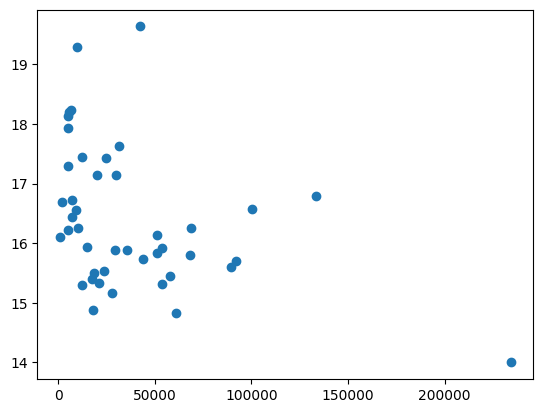

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df_merge["2021 [YR2021]"], df_merge["Age1stCodeAvg"])
plt.show()

In [6]:
# Prepare for part2 
# Convert the 'minimum' number back to age range 
df_merge['Age1stCodeYoungest']=df_merge['Age1stCodeMin'].map({3:'Younger than 5 years', 7:'5 - 10 years', 14:'11 - 17 years', 21:'18 - 24 years', 30:'25 - 34 years', 40:'35 - 44 years', 50:'45 - 54 years', 60:'55 - 64 years', 70:'Older than 64 years'})

# Write the analyze data to a table in DB
import sqlite3
with sqlite3.connect('abn.db', timeout=10) as conn:
    df_merge.to_sql('CountryStartCodingAge', conn, if_exists='replace', index=False)